In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x = t_x/255.0
s_tt_x = tt_x/255.0
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y = train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape

(48000, 28, 28)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',name = 'hidden'))
model.add(keras.layers.Dense(10,activation='softmax',name = 'output'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(t_x,t_y,epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5316 - accuracy: 0.8137
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3547 - accuracy: 0.8724
Epoch 4/5
150

In [3]:
model.evaluate(v_x,v_y)

375/375 [==============================] - 1s 891us/step - loss: 0.3886 - accuracy: 0.8715


[0.38858240842819214, 0.8715000152587891]

In [4]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
# 미리 있는 sgd불러와서 사용.

In [5]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # 원하는 방식으로 객체 생성가능.
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics='accuracy') # 그 객체를 넣으면 된다. 

In [6]:
sgd = keras.optimizers.SGD(momentum=0.9,nesterov=True) # 모멘텀,네스테로프모멘텀

In [7]:
keras.optimizers.RMSprop

keras.optimizer_v2.rmsprop.RMSprop

In [8]:
keras.optimizers.Adagrad # 가장많이 활용되는 모델

keras.optimizer_v2.adagrad.Adagrad

In [9]:
model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(100,activation='relu',name = 'hidden'))
model1.add(keras.layers.Dense(10,activation='softmax',name = 'output'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model1.fit(t_x,t_y,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5281 - accuracy: 0.8150
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3989 - accuracy: 0.8571
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3549 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3300 - accuracy: 0.8796
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8848


In [11]:
model.evaluate(v_x,v_y),model1.evaluate(v_x,v_y)

375/375 [==============================] - 0s 896us/step - loss: 0.3470 - accuracy: 0.8736


([0.38858240842819214, 0.8715000152587891],
 [0.3469923436641693, 0.8735833168029785])

data 확인

In [12]:
t_x.shape

(48000, 28, 28)

모델생성

In [13]:
m1 = keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dense(300,activation='relu'))
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=m1.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8201 - val_loss: 0.3975 - val_accuracy: 0.8568
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3729 - accuracy: 0.8641 - val_loss: 0.3922 - val_accuracy: 0.8539
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8771 - val_loss: 0.3527 - val_accuracy: 0.8708
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3134 - accuracy: 0.8829 - val_loss: 0.3651 - val_accuracy: 0.8666
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2906 - accuracy: 0.8916 - val_loss: 0.3455 - val_accuracy: 0.8744
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8950 - val_loss: 0.3528 - val_accuracy: 0.8760
Epoch 7/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2646 - accuracy: 0.8991 - val_loss: 0.3360 - val_accuracy:

In [15]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1500}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

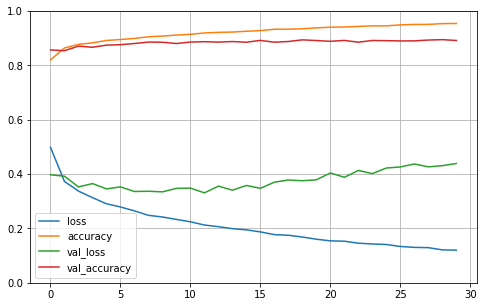

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [18]:
m2 = keras.Sequential()
m2.add(keras.layers.Flatten(input_shape=(28,28)))
m2.add(keras.layers.Dense(300,activation='relu'))
m2.add(keras.layers.Dense(100,activation='relu'))
m2.add(keras.layers.Dense(10,activation='softmax'))
m2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history1=m2.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.8228 - val_loss: 0.4174 - val_accuracy: 0.8504
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3709 - accuracy: 0.8630 - val_loss: 0.3519 - val_accuracy: 0.8767
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3327 - accuracy: 0.8765 - val_loss: 0.3442 - val_accuracy: 0.8743
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8857 - val_loss: 0.3429 - val_accuracy: 0.8747
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.8927 - val_loss: 0.3543 - val_accuracy: 0.8673
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.8976 - val_loss: 0.3324 - val_accuracy: 0.8808
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9020 - val_loss: 0.3571 - val_accuracy:

(0.0, 1.0)

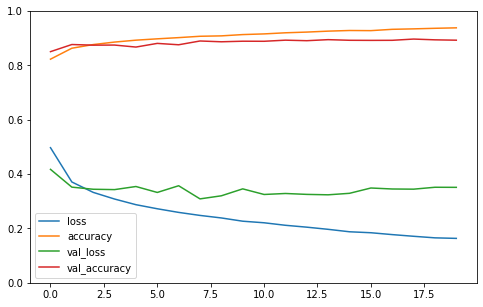

In [20]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)

In [21]:
m3 = keras.Sequential()
m3.add(keras.layers.Flatten(input_shape=(28,28)))
m3.add(keras.layers.Dense(300,activation='relu'))
m3.add(keras.layers.Dense(100,activation='relu'))
m3.add(keras.layers.Dense(10,activation='softmax'))
m3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
history2=m3.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7532 - accuracy: 0.7501 - val_loss: 0.5462 - val_accuracy: 0.8125
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4965 - accuracy: 0.8277 - val_loss: 0.4958 - val_accuracy: 0.8254
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8414 - val_loss: 0.4613 - val_accuracy: 0.8353
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4213 - accuracy: 0.8504 - val_loss: 0.4123 - val_accuracy: 0.8563
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4022 - accuracy: 0.8575 - val_loss: 0.4145 - val_accuracy: 0.8554
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3861 - accuracy: 0.8643 - val_loss: 0.4034 - val_accuracy: 0.8562
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3726 - accuracy: 0.8671 - val_loss: 0.3932 - val_accuracy:

(0.0, 1.0)

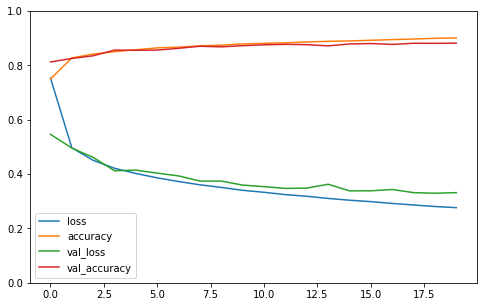

In [23]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)

In [24]:
m3.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8723


[0.3574104309082031, 0.8723000288009644]

In [25]:
m2.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3870 - accuracy: 0.8890


[0.38698235154151917, 0.8889999985694885]

In [26]:
m1.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.4676 - accuracy: 0.8834


[0.4676257371902466, 0.883400022983551]